# Hard-Margin SVM

In [12]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix,solvers
from sklearn.utils import shuffle
from sklearn.svm import  LinearSVC

## Data Generation

In [4]:
# data generation
np.random.seed(520)
def data_generation(n,basepoint,ylabel):
    x1 = np.random.random((n,))+np.array([basepoint[0]]*n)
    x2 = np.random.random((n,))+np.array([basepoint[1]]*n)
    y = np.array([ylabel]*n)
    data = pd.DataFrame({"x1":x1,"x2":x2,"y":y})
    return data

# positive data
positivedata = data_generation(n=30,basepoint=(1,3),ylabel=1)
# negative data
negativedata = data_generation(n=20,basepoint=(3,1),ylabel=-1)
# train data
train_data = pd.concat([positivedata,negativedata])
train_data = shuffle(train_data)
train_data.index = range(train_data.shape[0])
train_data.head(5)

,x1,x2,y
0,3.799045,1.773208,-1
1,1.586502,3.739881,1
2,3.664959,1.145345,-1
3,1.059613,3.263852,1
4,1.279567,3.872181,1


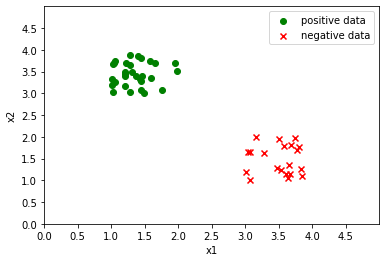

In [5]:
# train data scatter plot
plt.scatter(x=positivedata["x1"],y=positivedata["x2"],marker="o",c="green",label="positive data")
plt.scatter(x=negativedata["x1"],y=negativedata["x2"],marker="x",c="red",label="negative data")
plt.xlabel("x1")
plt.ylabel("x2")
plt.xlim((0,5))
plt.ylim((0,5))
plt.xticks(np.arange(0,5,0.5))
plt.yticks(np.arange(0,5,0.5))
plt.legend()

## Hard-Margin SVM Algorithm

In [6]:
# data matrix
train_X = train_data.iloc[:,[0,1]].values
train_y = train_data.iloc[:,2].values

# parameters solving
def HardMargin_SVM(X,y):
    Y = np.array([y]*X.shape[1]).T
    XdotY = X * Y
    n_samples = X.shape[0]
    Gram_Matrix = np.zeros((n_samples,n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            Gram_Matrix[i,j] = np.dot(XdotY[i],XdotY[j])
    
    P = matrix(Gram_Matrix).T
    q = matrix(-np.ones(n_samples))
    G = matrix(-np.eye(n_samples))
    h = matrix(np.zeros(n_samples))
    A = matrix(y.astype(float)).T
    b = matrix([0.0])

    lamda = np.array(solvers.qp(P,q,G,h,A,b)['x'])
    threshold = 1e-5
    lamda[lamda < threshold] = 0
    
    w_hat = np.round(np.sum(lamda*XdotY,axis=0),4)

    positive_index = np.where(lamda>0)[0][0]
    SV_x = X[positive_index]
    SV_y = y[positive_index]
    GM_xwithSVx = np.zeros(n_samples)
    for i in range(n_samples):
        GM_xwithSVx[i] = np.dot(X[i],SV_x)

    lamda = lamda.ravel()
    b_hat = round(SV_y - np.dot(lamda,y * GM_xwithSVx),4)

    return [w_hat,b_hat],lamda

theta,lamda = HardMargin_SVM(X=train_X,y=train_y)

    

     pcost       dcost       gap    pres   dres
 0: -1.9437e+00 -3.3220e+00  9e+01  9e+00  1e+00
 1: -5.1268e-01 -1.4543e+00  6e+00  5e-01  8e-02
 2: -2.4485e-01 -9.4850e-01  7e-01  2e-16  1e-15
 3: -4.4781e-01 -6.5603e-01  2e-01  9e-17  1e-15
 4: -6.1196e-01 -6.5142e-01  4e-02  2e-16  1e-15
 5: -6.4066e-01 -6.4112e-01  5e-04  1e-16  2e-15
 6: -6.4099e-01 -6.4100e-01  5e-06  1e-16  2e-15
 7: -6.4099e-01 -6.4099e-01  5e-08  1e-16  2e-15
Optimal solution found.


In [7]:
theta

[array([-0.8985,  0.6889]), 0.4643]

## SVM Model

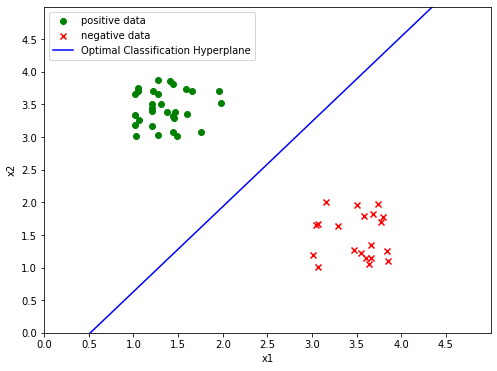

In [8]:
# draw the Optimal Classification Hyperplane
w,b = theta[0],theta[1]
x1 = np.linspace(0,5,1000)
x2 = -(w[0]*x1+b)/w[1]
plt.figure(figsize=(8, 6))
plt.scatter(x=positivedata["x1"],y=positivedata["x2"],marker="o",c="green",label="positive data")
plt.scatter(x=negativedata["x1"],y=negativedata["x2"],marker="x",c="red",label="negative data")
plt.plot(x1,x2,c="blue",label="Optimal Classification Hyperplane")
plt.xlabel("x1")
plt.ylabel("x2")
plt.xlim((0,5))
plt.ylim((0,5))
plt.xticks(np.arange(0,5,0.5))
plt.yticks(np.arange(0,5,0.5))
plt.legend()


## sklearn SVM

In [15]:
svm = LinearSVC(penalty="l2",C=1.0,loss='hinge')
svm.fit(train_X,train_y)
w,b = svm.coef_[0],svm.intercept_[0]
w,b


(array([-0.82403846,  0.78602977]), 0.03487903650340493)

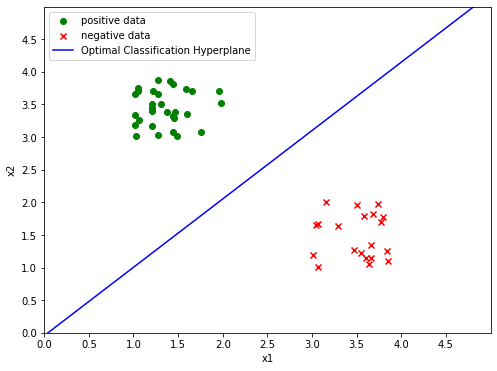

In [16]:
x1 = np.linspace(0,5,1000)
x2 = -(w[0]*x1+b)/w[1]
plt.figure(figsize=(8, 6))
plt.scatter(x=positivedata["x1"],y=positivedata["x2"],marker="o",c="green",label="positive data")
plt.scatter(x=negativedata["x1"],y=negativedata["x2"],marker="x",c="red",label="negative data")
plt.plot(x1,x2,c="blue",label="Optimal Classification Hyperplane")
plt.xlabel("x1")
plt.ylabel("x2")
plt.xlim((0,5))
plt.ylim((0,5))
plt.xticks(np.arange(0,5,0.5))
plt.yticks(np.arange(0,5,0.5))
plt.legend()